In [1]:
import matplotlib.pyplot as plt
import matplotlib_inline

from sklearn.model_selection import GroupKFold, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree

# Import helperfunctions
from ML_functions import fun_load_settings, fun_load_data, fun_preprocessing, fun_fit_tuning
from ML_functions import fun_scaled_neg_MAPE, fun_tuning_results, fun_scores
from ML_functions import plot_feature_weights

# Set the default optimization problem for the case of manual executing the script (choose either "TSP" or "CVRP")
default_optimization_problem = "TSP"

# Call the function to define optimization_problem based on how the notebook is executed
# If the notebook is run by the script "main.ipynb", load optimization_problem from "settings.json". Otherwise use the default optimization problem from above
optimization_problem = fun_load_settings(default_optimization_problem)

# Load data
data, _ = fun_load_data(optimization_problem)

# Do the train test split during the preprocessing
X_train, X_test, y_train, y_test, train_data = fun_preprocessing(data, train_size=0.8)

The notebook was executed by another notebook. :)
Optimization Problem: 'TSP'


# **Decision Trees**

{'Search type': 'RandomizedSearchCV',
 'Parameter combinations': 50,
 'Total tuning time': '1m, 15s',
 'Total tuning fit time': '4m, 7s',
 'Total tuning prediction time': '3s'}

CV MAPE (scaled) train data:  11.6332 %


**Best model / parameter combination:**

{'min_samples_leaf': 19,
 'min_impurity_decrease': 0.0001,
 'max_leaf_nodes': 2000,
 'max_depth': 45}

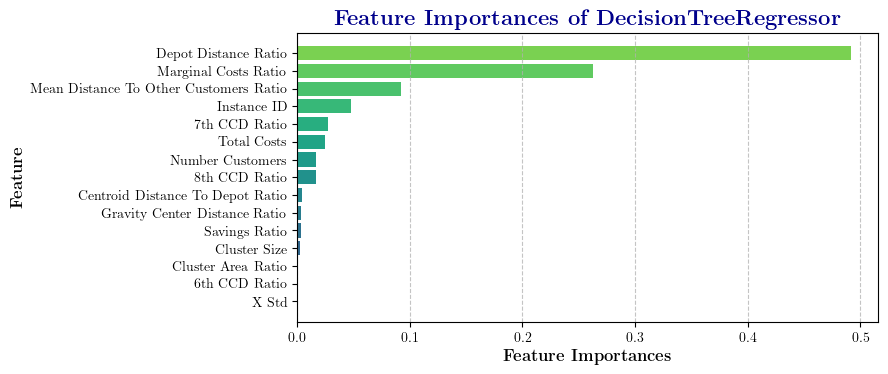

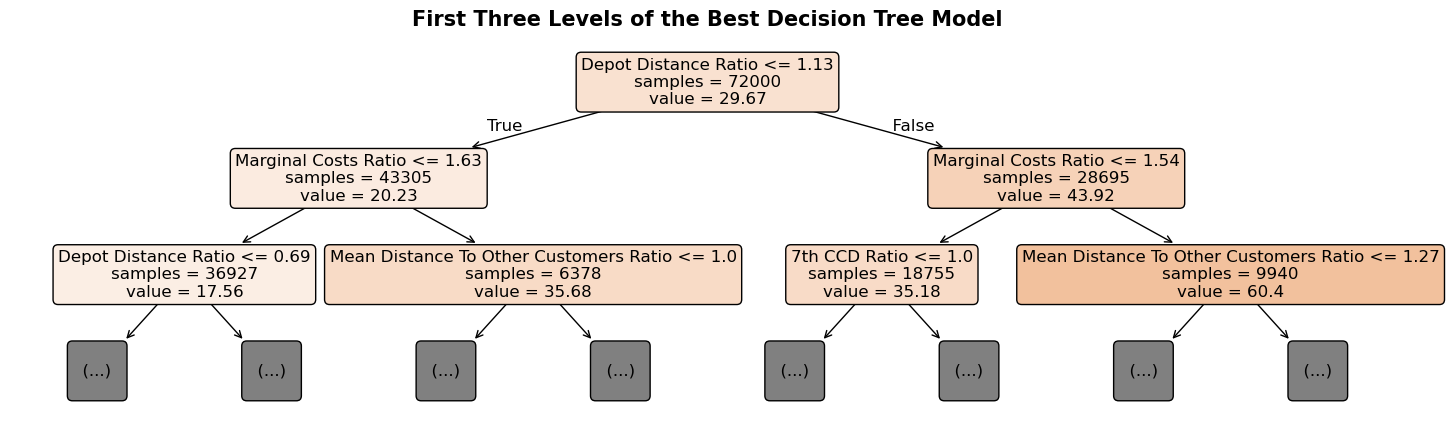

**Cross validation scores of different parameter combinations:**

,max_depth,max_leaf_nodes,min_samples_leaf,min_impurity_decrease,mean_test_score,converted_mean_fit_time
0,40,2500,19,0.0001,-0.116332,4s
1,45,2000,19,0.0001,-0.116332,4s
2,25,None,16,0.0001,-0.116386,4s
3,20,2250,21,0.0001,-0.116538,4s
4,35,1750,21,0.0001,-0.116538,4s
5,35,2750,21,0.0001,-0.116538,4s
6,15,2750,13,0.0001,-0.116553,5s
7,35,2250,18,0.0001,-0.116572,4s
8,20,None,18,0.0001,-0.116578,3s
9,15,2000,21,0.0001,-0.116619,4s


In [2]:
# Randomized search cross validation
param_distributions = {"max_depth": range(15, 50, 5),
                       "max_leaf_nodes": list(range(1750, 3000, 250)) + [None],
                       "min_samples_leaf": range(1, 26),
                       "min_impurity_decrease": [0.0001, 0.001]} # 0.01 did not perform

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_distributions=param_distributions, 
                                   cv=GroupKFold(n_splits=3).split(X_train, y_train, groups=X_train["Instance ID"]),
                                   n_iter=50, scoring=fun_scaled_neg_MAPE,
                                   verbose=False, n_jobs=-1, random_state=42)
tuning_details = fun_fit_tuning(random_search, X_train, y_train, file_name=optimization_problem + "_DT")

# View results of grid search cross validation
model_results_dict = fun_scores(random_search, X_train, y_train)
model_results_dict.update(tuning_details)

# View feature importances of best estimator
plot_feature_weights(model=random_search.best_estimator_, n_features=15)

# Visualize the tree
plt.figure(figsize=(18, 5))
plot_tree(decision_tree=random_search.best_estimator_, max_depth=2, feature_names=X_train.columns, filled=True, 
          impurity=False, rounded=True, precision=2, fontsize=12)
plt.title("First Three Levels of the Best Decision Tree Model", size=15, fontweight="bold")
plt.show()

# View grid search CV scores of all parameter combinations
results_df = fun_tuning_results(random_search, param_distributions)